In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from six import StringIO
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing, base, metrics
from sklearn.metrics import precision_score, recall_score,roc_auc_score, accuracy_score, f1_score, precision_recall_curve, roc_curve, classification_report
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("data.csv")
data = df.copy()
df = df.iloc[:,1:]

## Project Description 

#### CSAI 801 Project: COVID-19 Outcome Prediction
` this dataset to measure `
#### columns 
1. Country: where the person resides
2. Location: which part in the Country
3. Age: Classification of the age group for each person, based on WHO Age Group Standard
4. Gender: Male or Female
5. Visited_Wuhan: whether the person has visited Wuhan, China or not
6. From_Wuhan: whether the person is from Wuhan, China or not
7. Symptoms: there are six families of symptoms that are coded in six fields.
13. Time_before_symptoms_appear:
14. Result: death (1) or recovered (0)

**as presented below**

In [7]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [8]:
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

location        0.0
country         0.0
gender          0.0
age             0.0
vis_wuhan       0.0
from_wuhan      0.0
symptom1        0.0
symptom2        0.0
symptom3        0.0
symptom4        0.0
symptom5        0.0
symptom6        0.0
diff_sym_hos    0.0
result          0.0
dtype: float64

<AxesSubplot:>

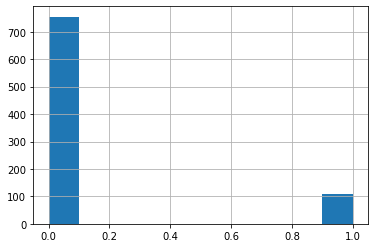

In [9]:
# imbalanced 
df["result"].hist()

0    0.874855
1    0.125145
Name: result, dtype: float64

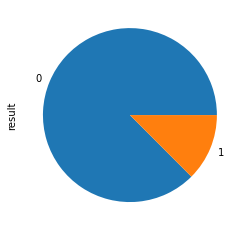

In [10]:
data['result'].value_counts().plot.pie()
data['result'].value_counts(normalize=True) 

In [11]:
df["gender"] = df["gender"].astype("object")
df["country"] = df["country"].astype("object")
df["location"] = df["location"].astype("object");

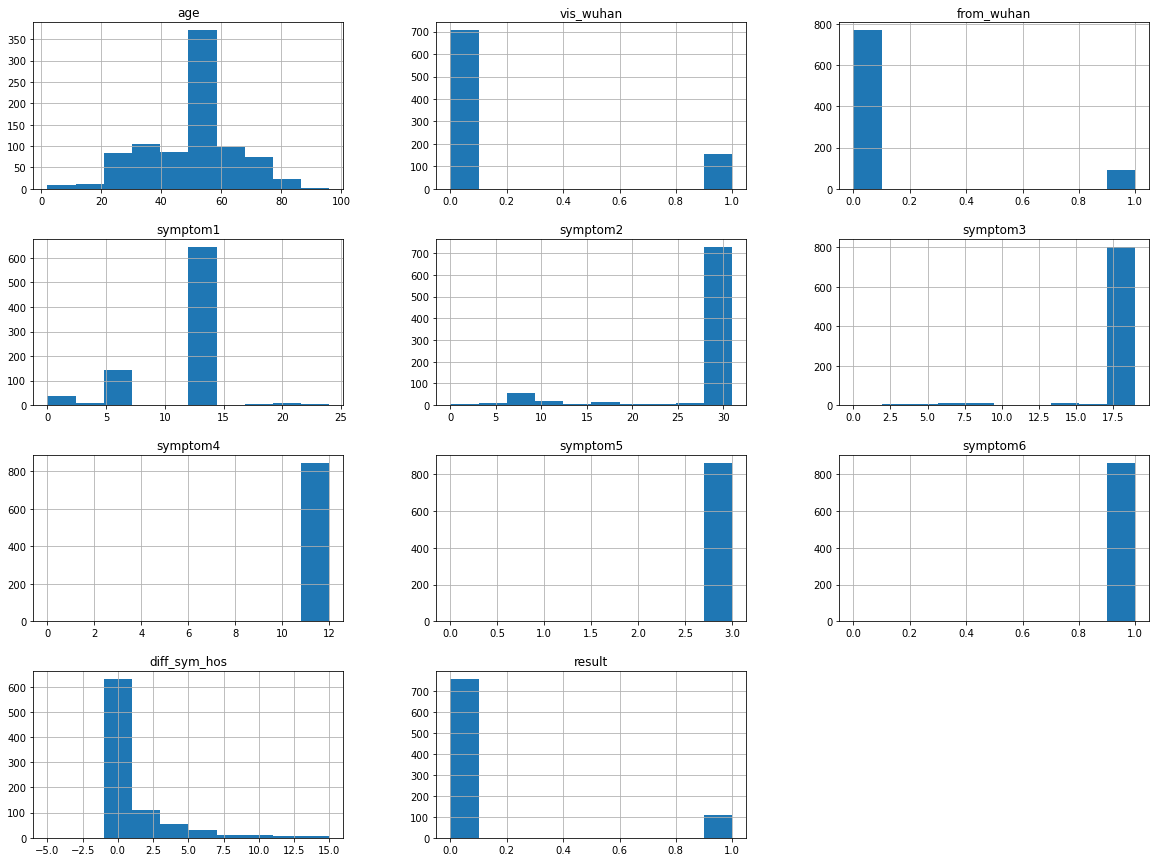

In [12]:
df.iloc[:,2:].hist( figsize=(20, 15));